In [45]:
import numpy as np
import matplotlib.pyplot as plt

class IK():
    def __init__(self, v):

        # gating variables
        self.n_array = []

        # initial conditions
        self.g_bar_K = 0.36
        self.EK = -72.14
        self.n_array.append(self.n_inf(v))
        self.i_list = []

    def n_inf(self, v):
        return self.An(v) / (self.An(v) + self.Bn(v))

    # change in gating variables 
    def dndt(self, v, n):
        return self.An(v) * (1 - n) - (self.Bn(v) * n)

    # forward rate constant
    def An(self, v):
        return (0.01 * (v + 50)) / (1 - np.exp((-(v + 50)) / 10))

    # reverse rate constant
    def Bn(self, v):
        return 0.125 * np.exp(-(v + 60) / 80)

    def get_current(self, v, dt):

        # get gate
        n = self.n_array[-1]

        # calculate conductance
        gK = self.g_bar_K * (n**4)

        # update new n value
        self.n_array.append(n + dt * self.dndt(v, n))

        # return current
        i = gK * (v - self.EK)
        self.i_list.append(i)
        return i 

class INa():
    def __init__(self, v):

        # gating variables
        self.m_array = []
        self.h_array = []
        self.i_list = []

        # initial conditions
        self.g_bar_Na = 1.2
        self.ENa = 55.17
        self.m_array.append(self.m_inf(v))
        self.h_array.append(self.h_inf(v))

    def m_inf(self, v):
        return self.Am(v) / (self.Am(v) + self.Bm(v))

    def h_inf(self, v):
        return self.Ah(v) / (self.Ah(v) + self.Bh(v))

    def dmdt(self, v, m):
        return self.Am(v) * (1 - m) - (self.Bm(v) * m)

    def dhdt(self, v, h):
        return self.Ah(v) * (1 - h) - (self.Bh(v) * h)

    def Am(self, v):
        return (0.091 * (v + 38)) / (1 - np.exp(-(v + 38) / 5))

    def Bm(self, v):
        return (-0.062 * (v + 38)) / (1 - np.exp((v + 38) / 5))

    def Ah(self, v):
        return 0.016 * np.exp((-55 - v) / 15)

    def Bh(self, v):
        return 2.07 / ((np.exp(17 - v) / 21) + 1)

    def get_current(self, v, dt):

        m = self.m_array[-1]
        h = self.h_array[-1]

        # conductance
        gNa = self.g_bar_Na * (m**3) * h

        # update 
        self.m_array.append(m + dt * self.dmdt(v, m))
        self.h_array.append(h + dt * self.dhdt(v, m))

        # return
        i = gNa * (v - self.ENa)
        self.i_list.append(i)
        return i 

class Ileak():
    def __init__(self, v):

        self.g_bar_leak = 0.003
        self.Eleak = -49.42
        self.i_list = []

    def get_current(self, v, dt):

        # conductance
        gleak = self.g_bar_leak

        # return
        i = gleak * (v - self.Eleak)
        self.i_list.append(i)
        return i


In [46]:
# initial settings for simulation
dt = 0.01
ms_to_plot = 100
t = np.arange(0, ms_to_plot, dt)
I = 0.1
initial_v = -60
Cm = 0.29
v_array = [initial_v]

# initialize our channel objects
k = IK(initial_v)
na = INa(initial_v)
leak = Ileak(initial_v)

# iterate timepoints
for i in range(0, len(t) - 1):

    # get last v
    v = v_array[-1]
    currents = [IK, INa, Ileak]
    dvdt = 1 / Cm * (I - (k.get_current(v, dt) + na.get_current(v, dt) + leak.get_current(v, dt)))
    v_array.append(v + (dt * dvdt))



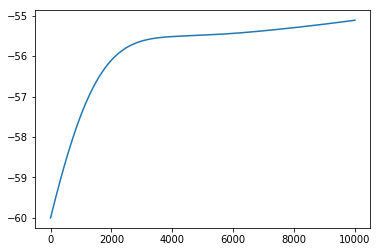

In [47]:
plt.plot(v_array)
plt.show()

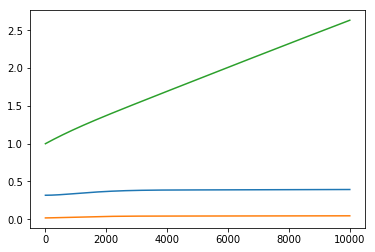

In [48]:
plt.plot(k.n_array)
plt.plot(na.m_array)
plt.plot(na.h_array)
plt.show()